<a href="https://colab.research.google.com/github/mgfernan/gsl_uab/blob/main/plab_survey_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing node positions

One of the requirements to obtain the position of a user terminal is to know the node positions. But how are they obtained? One option is by performing a survey campaign (using for instance Total Stations). Total stations measure angles and distances. 

This notebook illustrate how to calculate the position of 4 nodes (pentagons) by means of **measurements** of **angles** and distances similar to those provided by [total stations](https://en.wikipedia.org/wiki/Total_station).


In [25]:
import math
from dataclasses import dataclass

import matplotlib.pyplot as plt

@dataclass
class Measurement(object):
  angle_deg: float
  distance_m: float

@dataclass
class Position(object):
  x_m: float
  y_m: float

  def __repr__(self):

    return f"({self.x_m:0.2f} , {self.y_m:0.2f})"

(26.75 , 49.01)
(58.67 , 48.10)
(61.77 , 33.87)
(21.30 , 16.97)


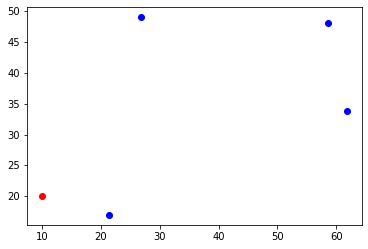

In [26]:
ref_a = Position(10, 20)


measurements = [ 
    Measurement(30, 33.5),
    Measurement(60, 56.2),
    Measurement(75, 53.6),
    Measurement(105, 11.7)]

nodes = []

for measurement in measurements:

  angle_rad = math.radians(measurement.angle_deg)

  x = measurement.distance_m * math.sin(angle_rad)
  y = measurement.distance_m * math.cos(angle_rad)


  node = Position(ref_a.x_m + x, ref_a.y_m + y)

  dx = (node.x_m-ref_a.x_m)
  dy = (node.y_m-ref_a.y_m)

  nodes.append(node)


# Plot the results
plt.plot(ref_a.x_m, ref_a.y_m, 'or')
for node in nodes:
  plt.plot(node.x_m, node.y_m, 'ob')
  print(node)
